In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino1.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal1_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal1_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

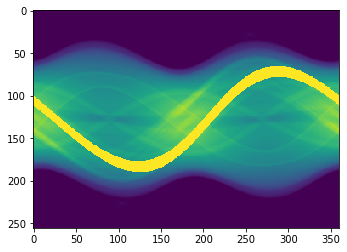

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal1_img)
plt.colorbar

In [5]:
metal1_img.shape

(256, 360)

In [6]:
for i in range(256):
    if min(metal1_img[i]) < 0:
        print("x")
max(metal1_img[100])

300.0

In [7]:
result_img = metal1_img
window_size = 3

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(window_size, 1, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 1, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 1, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 1, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 1, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 1, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [9]:
k = 0
for i in range(256-window_size-1):
    for j in range(30):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                k = k+1

In [10]:
train_data = np.zeros((k,window_size,1,1))
result_data = np.zeros((k,1))
k = 0
for i in range(256-window_size-1):
    for j in range(30):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                for w in range(window_size):
                    train_data[k,w,0,0] = result_img[i+w,j]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=10)

(5202, 3, 1, 1)
(5202, 1)
Epoch 1/10
163/163 [==============================] - 0s 899us/step - loss: 5.1048 - accuracy: 0.2880
Epoch 2/10
163/163 [==============================] - 0s 875us/step - loss: 3.6527 - accuracy: 0.3105
Epoch 3/10
163/163 [==============================] - 0s 906us/step - loss: 3.5815 - accuracy: 0.3139
Epoch 4/10
163/163 [==============================] - 0s 899us/step - loss: 3.5202 - accuracy: 0.3131
Epoch 5/10
163/163 [==============================] - 0s 899us/step - loss: 3.4480 - accuracy: 0.3158
Epoch 6/10
163/163 [==============================] - 0s 967us/step - loss: 3.3986 - accuracy: 0.3185
Epoch 7/10
163/163 [==============================] - 0s 875us/step - loss: 3.3757 - accuracy: 0.3160
Epoch 8/10
163/163 [==============================] - 0s 881us/step - loss: 3.2975 - accuracy: 0.3172
Epoch 9/10
163/163 [==============================] - 0s 893us/step - loss: 3.2649 - accuracy: 0.3206
Epoch 10/10
163/163 [==============================] - 0

In [11]:
l = 0
for i in range(256-window_size-1):
    for j in range(30):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,1,1))
            for w in range(window_size):
                test_data[0,w,0,0] = result_img[i+w,j]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])
            l = l+1

    k = 0
    z = 0

    for i in range(256-window_size-1):
        for j in range(30):
            if 0 in result_img[i:i+window_size+1,j]:
                z=0
            else:
                if 300 in result_img[i:i+window_size+1,j]:
                    z = 0
                else:
                    k = k+1
    train_data = np.zeros((k,window_size,1,1))
    result_data = np.zeros((k,1))
            
    k = 0

    for i in range(256-window_size-1):
        for j in range(30):
            if 0 in result_img[i:i+1+window_size,j]:
                z=0
            else:
                if 300 in result_img[i:i+1+window_size,j]:
                    z = 0
                else:
                    for w in range(window_size):
                        train_data[k,w,0,0] = result_img[i+w,j]
                    result_data[k,0] = int(result_img[i+window_size,j])
                    k = k+1
    model.fit(train_data, result_data, epochs=10)

Epoch 1/10
163/163 [==============================] - 0s 881us/step - loss: 3.1021 - accuracy: 0.3222
Epoch 2/10
163/163 [==============================] - 0s 887us/step - loss: 3.0756 - accuracy: 0.3201
Epoch 3/10
163/163 [==============================] - 0s 875us/step - loss: 2.9858 - accuracy: 0.3276
Epoch 4/10
163/163 [==============================] - 0s 893us/step - loss: 2.9744 - accuracy: 0.3266
Epoch 5/10
163/163 [==============================] - 0s 881us/step - loss: 2.9117 - accuracy: 0.3301
Epoch 6/10
163/163 [==============================] - 0s 887us/step - loss: 2.8697 - accuracy: 0.3324
Epoch 7/10
163/163 [==============================] - 0s 899us/step - loss: 2.8611 - accuracy: 0.3326
Epoch 8/10
163/163 [==============================] - 0s 887us/step - loss: 2.8181 - accuracy: 0.3354
Epoch 9/10
163/163 [==============================] - 0s 887us/step - loss: 2.7714 - accuracy: 0.3353
Epoch 10/10
163/163 [==============================] - 0s 899us/step - loss: 2.747

163/163 [==============================] - 0s 924us/step - loss: 2.0788 - accuracy: 0.3825
Epoch 2/10
163/163 [==============================] - 0s 918us/step - loss: 2.1042 - accuracy: 0.3804
Epoch 3/10
163/163 [==============================] - 0s 924us/step - loss: 2.1353 - accuracy: 0.3706
Epoch 4/10
163/163 [==============================] - 0s 924us/step - loss: 2.1235 - accuracy: 0.3824
Epoch 5/10
163/163 [==============================] - 0s 924us/step - loss: 2.0767 - accuracy: 0.3854
Epoch 6/10
163/163 [==============================] - 0s 930us/step - loss: 2.1659 - accuracy: 0.3745
Epoch 7/10
163/163 [==============================] - 0s 942us/step - loss: 2.1358 - accuracy: 0.3862
Epoch 8/10
163/163 [==============================] - 0s 924us/step - loss: 2.1104 - accuracy: 0.3833
Epoch 9/10
163/163 [==============================] - 0s 942us/step - loss: 2.0722 - accuracy: 0.3837
Epoch 10/10
163/163 [==============================] - 0s 918us/step - loss: 2.1179 - accurac

163/163 [==============================] - 0s 906us/step - loss: 1.9638 - accuracy: 0.3997
Epoch 2/10
163/163 [==============================] - 0s 906us/step - loss: 1.9955 - accuracy: 0.3956
Epoch 3/10
163/163 [==============================] - 0s 924us/step - loss: 1.9553 - accuracy: 0.3970
Epoch 4/10
163/163 [==============================] - 0s 997us/step - loss: 1.9311 - accuracy: 0.4025
Epoch 5/10
163/163 [==============================] - 0s 979us/step - loss: 1.9199 - accuracy: 0.4062
Epoch 6/10
163/163 [==============================] - 0s 924us/step - loss: 1.9182 - accuracy: 0.4023
Epoch 7/10
163/163 [==============================] - 0s 942us/step - loss: 2.0074 - accuracy: 0.3956
Epoch 8/10
163/163 [==============================] - 0s 924us/step - loss: 1.9794 - accuracy: 0.4014
Epoch 9/10
163/163 [==============================] - 0s 906us/step - loss: 1.9232 - accuracy: 0.4073
Epoch 10/10
163/163 [==============================] - 0s 948us/step - loss: 1.9451 - accurac

163/163 [==============================] - 0s 924us/step - loss: 1.8579 - accuracy: 0.4104
Epoch 2/10
163/163 [==============================] - 0s 924us/step - loss: 1.8379 - accuracy: 0.4164
Epoch 3/10
163/163 [==============================] - 0s 985us/step - loss: 1.8168 - accuracy: 0.4212
Epoch 4/10
163/163 [==============================] - 0s 1ms/step - loss: 1.8369 - accuracy: 0.4148
Epoch 5/10
163/163 [==============================] - 0s 973us/step - loss: 1.8472 - accuracy: 0.4168
Epoch 6/10
163/163 [==============================] - 0s 979us/step - loss: 1.8641 - accuracy: 0.4187
Epoch 7/10
163/163 [==============================] - 0s 924us/step - loss: 1.9314 - accuracy: 0.4048
Epoch 8/10
163/163 [==============================] - 0s 918us/step - loss: 1.8231 - accuracy: 0.4204
Epoch 9/10
163/163 [==============================] - 0s 918us/step - loss: 1.8428 - accuracy: 0.4135
Epoch 10/10
163/163 [==============================] - 0s 924us/step - loss: 1.8434 - accuracy:

163/163 [==============================] - 0s 930us/step - loss: 1.7531 - accuracy: 0.4325
Epoch 2/10
163/163 [==============================] - 0s 948us/step - loss: 1.7420 - accuracy: 0.4293
Epoch 3/10
163/163 [==============================] - 0s 942us/step - loss: 1.7887 - accuracy: 0.4196
Epoch 4/10
163/163 [==============================] - 0s 948us/step - loss: 1.7494 - accuracy: 0.4300
Epoch 5/10
163/163 [==============================] - 0s 924us/step - loss: 1.7620 - accuracy: 0.4254
Epoch 6/10
163/163 [==============================] - 0s 924us/step - loss: 1.7649 - accuracy: 0.4264
Epoch 7/10
163/163 [==============================] - 0s 924us/step - loss: 1.7367 - accuracy: 0.4295
Epoch 8/10
163/163 [==============================] - 0s 942us/step - loss: 1.7984 - accuracy: 0.4227
Epoch 9/10
163/163 [==============================] - 0s 924us/step - loss: 1.7396 - accuracy: 0.4318
Epoch 10/10
163/163 [==============================] - 0s 924us/step - loss: 1.7549 - accurac

163/163 [==============================] - 0s 930us/step - loss: 1.6881 - accuracy: 0.4393
Epoch 2/10
163/163 [==============================] - 0s 948us/step - loss: 1.6996 - accuracy: 0.4385
Epoch 3/10
163/163 [==============================] - 0s 930us/step - loss: 1.6827 - accuracy: 0.4398
Epoch 4/10
163/163 [==============================] - 0s 930us/step - loss: 1.6763 - accuracy: 0.4468
Epoch 5/10
163/163 [==============================] - 0s 942us/step - loss: 1.6730 - accuracy: 0.4471
Epoch 6/10
163/163 [==============================] - 0s 930us/step - loss: 1.6855 - accuracy: 0.4427
Epoch 7/10
163/163 [==============================] - 0s 930us/step - loss: 1.6834 - accuracy: 0.4362
Epoch 8/10
163/163 [==============================] - 0s 930us/step - loss: 1.6710 - accuracy: 0.4456
Epoch 9/10
163/163 [==============================] - 0s 930us/step - loss: 1.6738 - accuracy: 0.4450
Epoch 10/10
163/163 [==============================] - 0s 930us/step - loss: 1.7433 - accurac

163/163 [==============================] - 0s 948us/step - loss: 1.6365 - accuracy: 0.4506
Epoch 2/10
163/163 [==============================] - 0s 942us/step - loss: 1.6125 - accuracy: 0.4608
Epoch 3/10
163/163 [==============================] - 0s 948us/step - loss: 1.6595 - accuracy: 0.4423
Epoch 4/10
163/163 [==============================] - 0s 942us/step - loss: 1.6629 - accuracy: 0.4479
Epoch 5/10
163/163 [==============================] - 0s 948us/step - loss: 1.6264 - accuracy: 0.4481
Epoch 6/10
163/163 [==============================] - 0s 948us/step - loss: 1.6223 - accuracy: 0.4541
Epoch 7/10
163/163 [==============================] - 0s 942us/step - loss: 1.6492 - accuracy: 0.4512
Epoch 8/10
163/163 [==============================] - 0s 930us/step - loss: 1.6390 - accuracy: 0.4491
Epoch 9/10
163/163 [==============================] - 0s 961us/step - loss: 1.6309 - accuracy: 0.4525
Epoch 10/10
163/163 [==============================] - 0s 942us/step - loss: 1.6448 - accurac

163/163 [==============================] - 0s 961us/step - loss: 1.6058 - accuracy: 0.4569
Epoch 2/10
163/163 [==============================] - 0s 948us/step - loss: 1.5983 - accuracy: 0.4625
Epoch 3/10
163/163 [==============================] - 0s 955us/step - loss: 1.6149 - accuracy: 0.4535
Epoch 4/10
163/163 [==============================] - 0s 961us/step - loss: 1.5863 - accuracy: 0.4635
Epoch 5/10
163/163 [==============================] - 0s 991us/step - loss: 1.5843 - accuracy: 0.4596
Epoch 6/10
163/163 [==============================] - 0s 991us/step - loss: 1.5882 - accuracy: 0.4541
Epoch 7/10
163/163 [==============================] - 0s 979us/step - loss: 1.5748 - accuracy: 0.4673
Epoch 8/10
163/163 [==============================] - 0s 961us/step - loss: 1.6004 - accuracy: 0.4544
Epoch 9/10
163/163 [==============================] - 0s 991us/step - loss: 1.5768 - accuracy: 0.4669
Epoch 10/10
163/163 [==============================] - 0s 985us/step - loss: 1.6044 - accurac

163/163 [==============================] - 0s 991us/step - loss: 1.5444 - accuracy: 0.4627
Epoch 2/10
163/163 [==============================] - 0s 1ms/step - loss: 1.5621 - accuracy: 0.4687
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 1.5573 - accuracy: 0.4642
Epoch 4/10
163/163 [==============================] - 0s 973us/step - loss: 1.5992 - accuracy: 0.4544
Epoch 5/10
163/163 [==============================] - 0s 991us/step - loss: 1.5471 - accuracy: 0.4712
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 1.5546 - accuracy: 0.4617
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 1.5476 - accuracy: 0.4685
Epoch 8/10
163/163 [==============================] - 0s 1ms/step - loss: 1.5621 - accuracy: 0.4598
Epoch 9/10
163/163 [==============================] - 0s 1ms/step - loss: 1.5678 - accuracy: 0.4631
Epoch 10/10
163/163 [==============================] - 0s 1ms/step - loss: 1.6031 - accuracy: 0.4583: 0s 

163/163 [==============================] - 0s 3ms/step - loss: 1.5290 - accuracy: 0.4708
Epoch 3/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5387 - accuracy: 0.4669
Epoch 4/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5677 - accuracy: 0.4654
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5456 - accuracy: 0.4679
Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5303 - accuracy: 0.4723
Epoch 7/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5448 - accuracy: 0.4662
Epoch 8/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5242 - accuracy: 0.4802
Epoch 9/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5393 - accuracy: 0.4706
Epoch 10/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5252 - accuracy: 0.4725
Epoch 1/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5344 - accuracy: 0.4767
Epoch 2/10

163/163 [==============================] - 0s 3ms/step - loss: 1.5146 - accuracy: 0.4785: 0s - loss: 1.4649 - 
Epoch 4/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5104 - accuracy: 0.4752
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5000 - accuracy: 0.4846
Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4963 - accuracy: 0.4804
Epoch 7/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5199 - accuracy: 0.4794
Epoch 8/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5017 - accuracy: 0.4821
Epoch 9/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5323 - accuracy: 0.4744
Epoch 10/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5363 - accuracy: 0.4691
Epoch 1/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4959 - accuracy: 0.4854
Epoch 2/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5385 - accur

163/163 [==============================] - 0s 3ms/step - loss: 1.4911 - accuracy: 0.4850
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5044 - accuracy: 0.4773
Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5113 - accuracy: 0.4831
Epoch 7/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5032 - accuracy: 0.4848
Epoch 8/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5210 - accuracy: 0.4750
Epoch 9/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4903 - accuracy: 0.4802
Epoch 10/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5004 - accuracy: 0.4781
Epoch 1/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4723 - accuracy: 0.4906
Epoch 2/10
163/163 [==============================] - 1s 3ms/step - loss: 1.4928 - accuracy: 0.4852
Epoch 3/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4810 - accuracy: 0.4812
Epoch 4/10

Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4640 - accuracy: 0.4881
Epoch 7/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4555 - accuracy: 0.4900
Epoch 8/10
163/163 [==============================] - 0s 3ms/step - loss: 1.5027 - accuracy: 0.4756
Epoch 9/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4670 - accuracy: 0.4835
Epoch 10/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4706 - accuracy: 0.4931
Epoch 1/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4807 - accuracy: 0.4806
Epoch 2/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4638 - accuracy: 0.4919
Epoch 3/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4674 - accuracy: 0.4942
Epoch 4/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4702 - accuracy: 0.4906
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 1.4670 - accuracy: 0.4829

164/164 [==============================] - 0s 985us/step - loss: 1.4995 - accuracy: 0.4790
Epoch 7/10
164/164 [==============================] - 0s 979us/step - loss: 1.4740 - accuracy: 0.4905
Epoch 8/10
164/164 [==============================] - 0s 979us/step - loss: 1.4691 - accuracy: 0.4870
Epoch 9/10
164/164 [==============================] - 0s 979us/step - loss: 1.4609 - accuracy: 0.4954
Epoch 10/10
164/164 [==============================] - 0s 979us/step - loss: 1.4809 - accuracy: 0.4899
211
211
248
240
229
240
240
232
240
232
Epoch 1/10
165/165 [==============================] - 0s 1ms/step - loss: 1.4683 - accuracy: 0.4909
Epoch 2/10
165/165 [==============================] - 0s 1ms/step - loss: 1.4958 - accuracy: 0.4853
Epoch 3/10
165/165 [==============================] - 0s 979us/step - loss: 1.4591 - accuracy: 0.4956
Epoch 4/10
165/165 [==============================] - 0s 979us/step - loss: 1.4849 - accuracy: 0.4813
Epoch 5/10
165/165 [==============================] - ET

168/168 [==============================] - 0s 974us/step - loss: 1.4998 - accuracy: 0.4863
Epoch 3/10
168/168 [==============================] - 0s 974us/step - loss: 1.4626 - accuracy: 0.4891
Epoch 4/10
168/168 [==============================] - 0s 974us/step - loss: 1.4684 - accuracy: 0.4930
Epoch 5/10
168/168 [==============================] - 0s 980us/step - loss: 1.4666 - accuracy: 0.4863
Epoch 6/10
168/168 [==============================] - 0s 980us/step - loss: 1.4682 - accuracy: 0.4941
Epoch 7/10
168/168 [==============================] - 0s 974us/step - loss: 1.4584 - accuracy: 0.4943
Epoch 8/10
168/168 [==============================] - 0s 974us/step - loss: 1.4646 - accuracy: 0.4960
Epoch 9/10
168/168 [==============================] - 0s 974us/step - loss: 1.4614 - accuracy: 0.4951
Epoch 10/10
168/168 [==============================] - 0s 980us/step - loss: 1.4936 - accuracy: 0.4796
238
248
238
248
238
248
248
253
253
253
232
248
238
232
Epoch 1/10
169/169 [================

172/172 [==============================] - 0s 974us/step - loss: 1.5136 - accuracy: 0.4890
Epoch 9/10
172/172 [==============================] - 0s 974us/step - loss: 1.5330 - accuracy: 0.4884
Epoch 10/10
172/172 [==============================] - 0s 968us/step - loss: 1.5043 - accuracy: 0.4844
229
238
229
238
203
245
240
240
240
232
209
209
209
Epoch 1/10
172/172 [==============================] - 0s 974us/step - loss: 1.4859 - accuracy: 0.4904
Epoch 2/10
172/172 [==============================] - 0s 980us/step - loss: 1.4819 - accuracy: 0.4879
Epoch 3/10
172/172 [==============================] - ETA: 0s - loss: 1.4764 - accuracy: 0.48 - 0s 974us/step - loss: 1.4730 - accuracy: 0.4883
Epoch 4/10
172/172 [==============================] - 0s 974us/step - loss: 1.4910 - accuracy: 0.4832
Epoch 5/10
172/172 [==============================] - 0s 974us/step - loss: 1.5020 - accuracy: 0.4915
Epoch 6/10
172/172 [==============================] - 0s 997us/step - loss: 1.5343 - accuracy: 0.486

175/175 [==============================] - 0s 1ms/step - loss: 1.5496 - accuracy: 0.4881
Epoch 6/10
175/175 [==============================] - 0s 1ms/step - loss: 1.5467 - accuracy: 0.4845
Epoch 7/10
175/175 [==============================] - 0s 1ms/step - loss: 1.5235 - accuracy: 0.4960
Epoch 8/10
175/175 [==============================] - 0s 998us/step - loss: 1.5461 - accuracy: 0.4828
Epoch 9/10
175/175 [==============================] - 0s 1ms/step - loss: 1.5524 - accuracy: 0.4803
Epoch 10/10
175/175 [==============================] - 0s 980us/step - loss: 1.5641 - accuracy: 0.4797
228
210
210
228
197
Epoch 1/10
176/176 [==============================] - 0s 997us/step - loss: 1.5904 - accuracy: 0.4715
Epoch 2/10
176/176 [==============================] - 0s 986us/step - loss: 1.5979 - accuracy: 0.4771
Epoch 3/10
176/176 [==============================] - 0s 986us/step - loss: 1.5266 - accuracy: 0.4865
Epoch 4/10
176/176 [==============================] - 0s 975us/step - loss: 1.51

176/176 [==============================] - 0s 1ms/step - loss: 1.5560 - accuracy: 0.4750
Epoch 5/10
176/176 [==============================] - 0s 992us/step - loss: 1.5426 - accuracy: 0.4836
Epoch 6/10
176/176 [==============================] - 0s 986us/step - loss: 1.5591 - accuracy: 0.4868
Epoch 7/10
176/176 [==============================] - 0s 975us/step - loss: 1.5212 - accuracy: 0.4900
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.5739 - accuracy: 0.4788
Epoch 9/10
176/176 [==============================] - 0s 986us/step - loss: 1.5159 - accuracy: 0.4948
Epoch 10/10
176/176 [==============================] - 0s 997us/step - loss: 1.5246 - accuracy: 0.4937
Epoch 1/10
176/176 [==============================] - 0s 986us/step - loss: 1.5317 - accuracy: 0.4853
Epoch 2/10
176/176 [==============================] - 0s 992us/step - loss: 1.5369 - accuracy: 0.4830
Epoch 3/10
176/176 [==============================] - 0s 980us/step - loss: 1.5335 - accuracy: 0

176/176 [==============================] - 0s 975us/step - loss: 1.5168 - accuracy: 0.4869
Epoch 5/10
176/176 [==============================] - 0s 980us/step - loss: 1.5175 - accuracy: 0.4956
Epoch 6/10
176/176 [==============================] - 0s 975us/step - loss: 1.5076 - accuracy: 0.4928
Epoch 7/10
176/176 [==============================] - 0s 975us/step - loss: 1.5249 - accuracy: 0.4795
Epoch 8/10
176/176 [==============================] - 0s 975us/step - loss: 1.5068 - accuracy: 0.4921
Epoch 9/10
176/176 [==============================] - 0s 980us/step - loss: 1.5438 - accuracy: 0.4786
Epoch 10/10
176/176 [==============================] - 0s 980us/step - loss: 1.5294 - accuracy: 0.4811
Epoch 1/10
176/176 [==============================] - 0s 975us/step - loss: 1.5085 - accuracy: 0.4923
Epoch 2/10
176/176 [==============================] - 0s 980us/step - loss: 1.5019 - accuracy: 0.4944
Epoch 3/10
176/176 [==============================] - 0s 969us/step - loss: 1.5415 - accurac

176/176 [==============================] - 0s 975us/step - loss: 1.5107 - accuracy: 0.4889
Epoch 5/10
176/176 [==============================] - 0s 969us/step - loss: 1.4920 - accuracy: 0.4967
Epoch 6/10
176/176 [==============================] - 0s 975us/step - loss: 1.4799 - accuracy: 0.5020
Epoch 7/10
176/176 [==============================] - 0s 986us/step - loss: 1.4793 - accuracy: 0.4997
Epoch 8/10
176/176 [==============================] - 0s 986us/step - loss: 1.4998 - accuracy: 0.4956
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.5056 - accuracy: 0.4892
Epoch 10/10
176/176 [==============================] - 0s 980us/step - loss: 1.4968 - accuracy: 0.4958
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.5124 - accuracy: 0.4855
Epoch 2/10
176/176 [==============================] - 0s 975us/step - loss: 1.5125 - accuracy: 0.4876
Epoch 3/10
176/176 [==============================] - 0s 980us/step - loss: 1.4873 - accuracy: 0

176/176 [==============================] - 0s 992us/step - loss: 1.4752 - accuracy: 0.4953
Epoch 5/10
176/176 [==============================] - 0s 992us/step - loss: 1.4705 - accuracy: 0.5008
Epoch 6/10
176/176 [==============================] - 0s 986us/step - loss: 1.4796 - accuracy: 0.5019
Epoch 7/10
176/176 [==============================] - 0s 997us/step - loss: 1.5280 - accuracy: 0.4852
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4809 - accuracy: 0.4978
Epoch 9/10
176/176 [==============================] - 0s 986us/step - loss: 1.4779 - accuracy: 0.4953
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4640 - accuracy: 0.5012
Epoch 1/10
176/176 [==============================] - 0s 975us/step - loss: 1.4732 - accuracy: 0.4981
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4923 - accuracy: 0.4939
Epoch 3/10
176/176 [==============================] - 0s 986us/step - loss: 1.4956 - accuracy: 0.4

176/176 [==============================] - 0s 975us/step - loss: 1.4714 - accuracy: 0.4983
Epoch 5/10
176/176 [==============================] - 0s 980us/step - loss: 1.4820 - accuracy: 0.5001
Epoch 6/10
176/176 [==============================] - 0s 975us/step - loss: 1.4858 - accuracy: 0.4924
Epoch 7/10
176/176 [==============================] - 0s 975us/step - loss: 1.4891 - accuracy: 0.4958
Epoch 8/10
176/176 [==============================] - 0s 980us/step - loss: 1.4673 - accuracy: 0.5029
Epoch 9/10
176/176 [==============================] - 0s 986us/step - loss: 1.4846 - accuracy: 0.4972
Epoch 10/10
176/176 [==============================] - 0s 980us/step - loss: 1.4627 - accuracy: 0.5035
Epoch 1/10
176/176 [==============================] - 0s 980us/step - loss: 1.4584 - accuracy: 0.5024
Epoch 2/10
176/176 [==============================] - 0s 980us/step - loss: 1.4720 - accuracy: 0.4976
Epoch 3/10
176/176 [==============================] - 0s 980us/step - loss: 1.4598 - accurac

176/176 [==============================] - 0s 1ms/step - loss: 1.4629 - accuracy: 0.5026
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4474 - accuracy: 0.5074
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4683 - accuracy: 0.5054
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4475 - accuracy: 0.5003
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4505 - accuracy: 0.5079
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 1.4381 - accuracy: 0.5038
Epoch 10/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4615 - accuracy: 0.4978
Epoch 1/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4561 - accuracy: 0.4992
Epoch 2/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4842 - accuracy: 0.4937
Epoch 3/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4538 - accuracy: 0.4997
Epoch 4/10

176/176 [==============================] - 0s 3ms/step - loss: 1.4506 - accuracy: 0.5008
Epoch 6/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4553 - accuracy: 0.5052
Epoch 7/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4677 - accuracy: 0.5035
Epoch 8/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4361 - accuracy: 0.5090
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4575 - accuracy: 0.4942
Epoch 10/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4428 - accuracy: 0.5061
Epoch 1/10
176/176 [==============================] - ETA: 0s - loss: 1.4354 - accuracy: 0.50 - 0s 3ms/step - loss: 1.4324 - accuracy: 0.5092
Epoch 2/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4650 - accuracy: 0.5015
Epoch 3/10
176/176 [==============================] - 1s 3ms/step - loss: 1.4543 - accuracy: 0.5058
Epoch 4/10
176/176 [==============================] - 0s 3ms/step - 

176/176 [==============================] - 1s 3ms/step - loss: 1.4333 - accuracy: 0.5060
Epoch 6/10
176/176 [==============================] - 1s 3ms/step - loss: 1.4766 - accuracy: 0.4940
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 1.4338 - accuracy: 0.5058
Epoch 8/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4437 - accuracy: 0.5118
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4203 - accuracy: 0.5124
Epoch 10/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4203 - accuracy: 0.5161
Epoch 1/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4268 - accuracy: 0.5129
Epoch 2/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4328 - accuracy: 0.5152
Epoch 3/10
176/176 [==============================] - 1s 3ms/step - loss: 1.4474 - accuracy: 0.5047
Epoch 4/10
176/176 [==============================] - 1s 3ms/step - loss: 1.4304 - accuracy: 0.5122
Epoch 5/10

176/176 [==============================] - 0s 3ms/step - loss: 1.4205 - accuracy: 0.5070
Epoch 6/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4242 - accuracy: 0.5140
Epoch 7/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4232 - accuracy: 0.5118
Epoch 8/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4460 - accuracy: 0.5077
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4300 - accuracy: 0.5072
Epoch 10/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4154 - accuracy: 0.5102
Epoch 1/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4454 - accuracy: 0.5086
Epoch 2/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4326 - accuracy: 0.5143
Epoch 3/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4428 - accuracy: 0.5092: 0s - loss: 1.4505 - ac
Epoch 4/10
176/176 [==============================] - 0s 3ms/step - loss: 1.4288 - acc

176/176 [==============================] - 0s 1ms/step - loss: 1.4069 - accuracy: 0.5116
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4212 - accuracy: 0.5177
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4054 - accuracy: 0.5202
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4079 - accuracy: 0.5180
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4076 - accuracy: 0.5134
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4115 - accuracy: 0.5157
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4365 - accuracy: 0.5017
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4194 - accuracy: 0.5136
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4558 - accuracy: 0.5022
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4184 - accuracy: 0.5104
Epoch 6/10

176/176 [==============================] - 0s 992us/step - loss: 1.4291 - accuracy: 0.5115
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4116 - accuracy: 0.5125
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4025 - accuracy: 0.5166
Epoch 10/10
176/176 [==============================] - 0s 997us/step - loss: 1.4044 - accuracy: 0.5188
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4084 - accuracy: 0.5141
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4276 - accuracy: 0.5092
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3984 - accuracy: 0.5182
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4038 - accuracy: 0.5216
Epoch 5/10
176/176 [==============================] - 0s 992us/step - loss: 1.4140 - accuracy: 0.5170
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4245 - accuracy: 0.5154
Epoc

176/176 [==============================] - 0s 992us/step - loss: 1.4414 - accuracy: 0.5092
Epoch 8/10
176/176 [==============================] - 0s 997us/step - loss: 1.4066 - accuracy: 0.5209
Epoch 9/10
176/176 [==============================] - 0s 992us/step - loss: 1.4154 - accuracy: 0.5072
Epoch 10/10
176/176 [==============================] - 0s 986us/step - loss: 1.4044 - accuracy: 0.5220
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3864 - accuracy: 0.5202
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4133 - accuracy: 0.5157
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4005 - accuracy: 0.5163
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3987 - accuracy: 0.5195
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 1.4020 - accuracy: 0.5163
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4174 - accuracy: 0.5172
Ep

176/176 [==============================] - 0s 1ms/step - loss: 1.4130 - accuracy: 0.5147
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4286 - accuracy: 0.5079
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3987 - accuracy: 0.5118
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4119 - accuracy: 0.5124
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4069 - accuracy: 0.5138
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3958 - accuracy: 0.5164
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3840 - accuracy: 0.5252
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3869 - accuracy: 0.5241
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3919 - accuracy: 0.5159
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3936 - accuracy: 0.5161
Epoch 8/10

Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3960 - accuracy: 0.5177
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3810 - accuracy: 0.5307
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4068 - accuracy: 0.5122
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3764 - accuracy: 0.5179
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4050 - accuracy: 0.5108
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4164 - accuracy: 0.5156
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4240 - accuracy: 0.5124
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3819 - accuracy: 0.5196
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4002 - accuracy: 0.5223
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3908 - accuracy: 0.5163

176/176 [==============================] - 0s 1ms/step - loss: 1.3779 - accuracy: 0.5184
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3933 - accuracy: 0.5182
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3983 - accuracy: 0.5145
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3787 - accuracy: 0.5298
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3792 - accuracy: 0.5289
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4150 - accuracy: 0.5136
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3968 - accuracy: 0.5177
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3818 - accuracy: 0.5257
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3864 - accuracy: 0.5164
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3930 - accuracy: 0.5220
Epoch 1/10

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

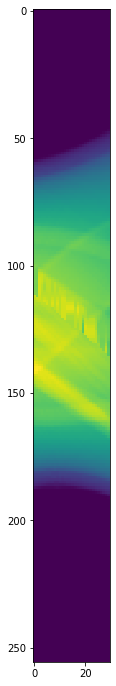

In [12]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:30])
plt.colorbar

In [13]:
plt.figure(figsize=(8,12))
plt.imshow(metal0_img[:,0:30])
plt.colorbar

NameError: name 'metal0_img' is not defined

<Figure size 576x864 with 0 Axes>

In [ ]:
f = open("images/sino0.txt", 'r')
line = f.read()
print(line)
f.close

In [ ]:
import numpy as np
metal0_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal0_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

In [ ]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/CNN1.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_training_txt.txt', result_img)